# $$\underline{\textbf{Solving Optimization Problem using Python Programming}}$$

## $\textbf{Covid-19 dataset WHO-COVID-19-global-data.csv}$

### Import Package

### $\textbf{Reading the data}$

In [496]:
pd.read_csv('WHO-COVID-19-global-data.csv')
Covid = pd.read_csv('WHO-COVID-19-global-data.csv',parse_dates=[0])
Covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
162577,2021-11-14,ZW,Zimbabwe,AFRO,35,133428,0,4696
162578,2021-11-15,ZW,Zimbabwe,AFRO,10,133438,1,4697
162579,2021-11-16,ZW,Zimbabwe,AFRO,33,133471,0,4697
162580,2021-11-17,ZW,Zimbabwe,AFRO,34,133505,1,4698


## 1. $\textbf{Prediction of the number of New_Cases with Linear_Regression}$

#### $\textbf{Extracting the columns of dates from the initial dataset}$

In [448]:
col=Covid.iloc[:,0]
col

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
162577   2021-11-14
162578   2021-11-15
162579   2021-11-16
162580   2021-11-17
162581   2021-11-18
Name: Date_reported, Length: 162582, dtype: datetime64[ns]

#### $\textbf{Building a new dataset with year, month and day}$

In [559]:
A=pd.DataFrame({'Year': col.dt.year,'Month':col.dt.month,'Day':col.dt.day,'Country':Covid['Country'], 'New_cases':Covid['New_cases'],'New_deaths':Covid['New_deaths'], 'Country_code':Covid['Country_code'], 'Cumulative_cases':Covid['Cumulative_cases'], 'Cumulatives_deaths':Covid['Cumulative_deaths'],'WHO_region':Covid['WHO_region']})
A

,Year,Month,Day,Country,New_cases,New_deaths,Country_code,Cumulative_cases,Cumulatives_deaths,WHO_region
0,2020,1,3,Afghanistan,0,0,AF,0,0,EMRO
1,2020,1,4,Afghanistan,0,0,AF,0,0,EMRO
2,2020,1,5,Afghanistan,0,0,AF,0,0,EMRO
3,2020,1,6,Afghanistan,0,0,AF,0,0,EMRO
4,2020,1,7,Afghanistan,0,0,AF,0,0,EMRO
...,...,...,...,...,...,...,...,...,...,...
162577,2021,11,14,Zimbabwe,35,0,ZW,133428,4696,AFRO
162578,2021,11,15,Zimbabwe,10,1,ZW,133438,4697,AFRO
162579,2021,11,16,Zimbabwe,33,0,ZW,133471,4697,AFRO
162580,2021,11,17,Zimbabwe,34,1,ZW,133505,4698,AFRO


#### $\textbf{Building a dataset for only Angola}$

In [556]:
D = A[(A['Year']==2021) & (A['Month']==11) & (A['Country']=='Angola')]
D

,Year,Month,Day,Country,New_cases,New_deaths,Country_code,Cumulative_cases,Cumulatives_deaths
4098,2021,11,1,Angola,59,2,AO,64433,1710
4099,2021,11,2,Angola,25,3,AO,64458,1713
4100,2021,11,3,Angola,29,0,AO,64487,1713
4101,2021,11,4,Angola,46,3,AO,64533,1716
4102,2021,11,5,Angola,50,2,AO,64583,1718
4103,2021,11,6,Angola,29,1,AO,64612,1719
4104,2021,11,7,Angola,42,0,AO,64654,1719
4105,2021,11,8,Angola,20,1,AO,64674,1720
4106,2021,11,9,Angola,50,1,AO,64724,1721
4107,2021,11,10,Angola,38,2,AO,64762,1723


#### $\textbf{Training the data}$

In [543]:
x = D[['Day']].values
Y = D[['New_cases']].values
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.5,random_state=0)
reg = LinearRegression()
reg.fit(x_train,Y_train)

LinearRegression()

#### $\textbf{Prediction}$

In [544]:
y_pred = reg.predict(x_test)

### $\textbf{Prediction for November 20, 2021}$

In [545]:
n_20 = reg.predict([[20]]).sum()
print('The number of new case on November 20, 2021 is:', n_20)

The number of new case on November 20, 2021 is: 14.809203142536475


### $\textbf{Prediction for November 21, 2021}$

In [546]:
n_21 = reg.predict([[21]]).sum()
print('The number of new case on November 21, 2021 is:', n_21)

The number of new case on November 21, 2021 is: 12.770482603815942


## PLot

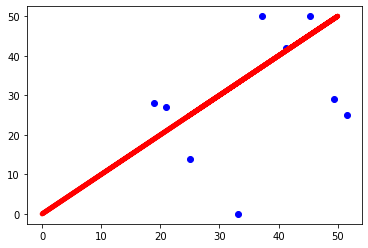

In [245]:
plt.scatter(y_pred,Y_test,color='b')
plt.plot(Y_test,Y_test,color='r',linewidth=5)

## $\textbf{Mean Square Error for linear regression}$

In [391]:
err = mean_squared_error(Y_test, y_pred)
print('The mean squared error is:', err)

The mean squared error is: 294.06763828583894


## $\textbf{Lasso Regression}$

#### $\textbf{Training the dataset}$

In [274]:
reg1=Lasso(alpha = 0.3)
reg1.fit(x_train,Y_test)

Lasso(alpha=0.3)

In [275]:
y1_pred=reg1.predict(x_test)

## $\textbf{Plot}$

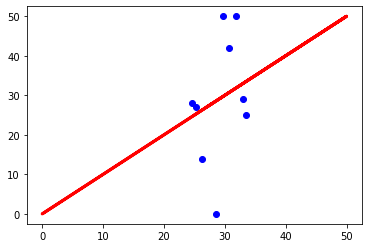

In [498]:
plt.scatter(y1_pred,Y_test,color='b')
plt.plot(Y_test,Y_test,color='r',linewidth=3)

## $\textbf{The mean Square Error for Lasso Regression}$

In [392]:
err1 = mean_squared_error(Y_test, y1_pred)
print('The mean squarred error is:',err1)

The mean squarred error is: 215.54175287920984


### $\textbf{Prediction for November 20, 2021}$

In [278]:
reg1.predict([[20]]).sum()

23.592143658810325

### $\textbf{Prediction for November 21, 2021}$

In [279]:
reg1.predict([[21]]).sum()

23.043490460157123

The Lasso model is more accurate than the LinearRegression model because its mean squared error is less than the other one. However, it's still not giving a better approximation. 

In conclusion, the Linear Model Regression are good for the prediction of this problem.

## 2. $\textbf{Prediction for the average number of New death for the whole Africa}$

In [562]:
DD = A[(A['Year']==2021) & (A['Month']==11) & (A['WHO_region']=='AFRO')]

In [602]:
D1 = DD.groupby(['Year','Day','Month','Country']).mean()
D2 = D1.reset_index()
D1

New_cases  New_deaths  \
Year Day Month Country                                              
2021 1   11    Algeria                             94           2   
               Angola                              59           2   
               Benin                                0           0   
               Botswana                             0           0   
               Burkina Faso                         0           0   
...                                               ...         ...   
     18  11    Togo                                11           0   
               Uganda                              27           3   
               United Republic of Tanzania          0           0   
               Zambia                              12           0   
               Zimbabwe                            52           1   

                                            Cumulative_cases  \
Year Day Month Country                                         
2021 1   11    Algeria                                206452   
               Angola                                  64433   
               Benin                                   24749   
               Botswana                               186594   
               Burkina Faso                            14793   
...                                                      ...   
     18  11    Togo                                    26178   
               Uganda                                 127073   
               United Republic of Tanzania             26227   
               Zambia                                 210020   
               Zimbabwe                               133557   

                                            Cumulatives_deaths  
Year Day Month Country                                          
2021 1   11    Algeria                                    5920  
               Angola                                     1710  
               Benin                                       161  
               Botswana                                   2406  
               Burkina Faso                                214  
...                                                        ...  
     18  11    Togo                                        243  
               Uganda                                     3247  
               United Republic of Tanzania                 727  
               Zambia                                     3666  
               Zimbabwe                                   4699  

[900 rows x 4 columns]

In [613]:
xx = D2[['Day']].values
YY = D2[['New_deaths']].values
xx_train,xx_test,YY_train,YY_test = train_test_split(xx,YY,test_size=0.2,random_state=0)
reg2 = LinearRegression()
reg2.fit(xx_train,YY_train)

LinearRegression()

In [596]:
yy_pred = reg2.predict(xx_test)

### $\textbf{Prediction for November 20, 2021}$

In [612]:
reg2.predict(np.array([[20]]))

array([[1.21022228]])

### $\textbf{Prediction for November 21, 2021}$

In [609]:
reg2.predict(np.array([[21]]))

array([[1.18074197]])

## $$\textbf{SAHeart.csv}$$

# 1.

###  (a). $\textbf{Uploading the dataset}$

In [194]:
H = pd.read_csv('SAheart.data')
H

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### (b). $\textbf{replacing non-number data with a reasonable numerical representation}$

In [195]:
H_dummies = pd.get_dummies(H,columns=['famhist'])
H_dummies

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,64,28.45,0.00,58,0,1,0
458,460,182,4.20,4.41,32.10,52,28.61,18.72,52,1,1,0
459,461,108,3.00,1.59,15.23,40,20.09,26.64,55,0,1,0
460,462,118,5.40,11.61,30.79,64,27.35,23.97,40,0,1,0


In [343]:
X_d = H_dummies[['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age','famhist_Absent','famhist_Present']].values

### 2. $\textbf{Training the LogisticRegression Model}$

In [463]:
y_d = H_dummies.iloc[:,[9]].values
X_d_train,X_d_test,y_d_train,y_d_test = train_test_split(X_d,y_d,test_size=0.25,random_state = 0)

In [441]:
 clas = LogisticRegression()

In [442]:
 clas.fit(X_d_train,y_d_train)

LogisticRegression()

In [443]:
Y_pred = clas.predict(X_d_test)
Y1 = Y_pred.reshape(-1,1)
Y1

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [499]:
error = mean_squared_error(y_d_test,Y_pred1)
print('The mean squarred error is:', error)

The mean squarred error is: 0.2672413793103448


### 3. $\textbf{Identify if the a patient with the following data is of high risk or not}$

In [616]:
Y_pred = clas.predict([[133, 3.3, 4.6, 34.5,0,1, 52, 30, 32, 44]])
if Y_pred == True:
    print ('There is a high probability for the person to get ill.')
else:
    print('The probability for the person to have heart disease is low')

There is a high probability for the person to get ill.


### 4. $\textbf{The most important factors for heart disease}$

In [434]:
H_dummies.corr()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,-0.147769,-0.026758,0.088825,-0.014064,-0.063808,-0.019941,0.019941
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354,-0.085645,0.085645
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718,-0.088601,0.088601
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053,-0.161353,0.161353
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121,-0.181721,0.181721
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156,-0.044809,0.044809
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095,-0.115595,0.115595
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531,-0.080520,0.080520
age,-0.014064,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973,-0.239667,0.239667
chd,-0.063808,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000,-0.272373,0.272373


The most determinant factor are:
- $\textbf{The age:}$ with around 37.29% 
- $\textbf{tobacco:} $ with around 29.97%
- $\textbf{famhist_present:} $ with around 27.23%
- $\textbf{Idl:} $ with around 26.30%
- $\textbf{adposity:} $ with around 25.41%

### 5. $\textbf{Does having a family history of coronary heart disease affect a patients chance of having
coronary heart disease?}$

According to the correlation between the factors and the target which is $\textit{Coronary heart disease},$ the response is $\textbf{YES}$ because if your family has family history of coronary heart disease, your probability to get it also is more that 27%

In [446]:
acc = accuracy_score(y_d_test,Y_pred1)
print('The accuracy of the model is:', acc)

The accuracy of the model is: 0.7327586206896551
